# NGHIA PHAN TRONG - FINAL PROJECT


# A.  IMPLEMENTATION

## A1. INITIAL STATISTICS

___
#### IMPORT LIBRARY

In [8]:
import pandas as pd
import numpy as np
import glob
import missingno as msno
import string

___
#### NEWEST REVIEW DATASET

In [9]:
# Create the path to the data location
path = r'newestreview'
all_files = glob.glob(path + "/*.csv")

# Loading the data file by file and create a column named "category"
datalist = []
for filename in all_files:
    # extract the category name from the file name
    start = filename.find('FREE')
    end=filename.find('_apps.csv')
    category = filename[start+5:end]
    # Loading the data and attach it into the datalist
    df = pd.read_csv(filename)
    df['category']=category
    datalist.append(df)
    
# Merger all the data
frame = pd.concat(datalist, axis=0, ignore_index=True)
frame.head()

,appTitle,userName,date,score,text,category
0,Photomath,NaN,"March 8, 2019",5,nice,EDUCATION
1,Photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION
2,Photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION
3,Photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION
4,Photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION


***
#### OVERVIEW ABOUT DATASET

(2715303, 6)


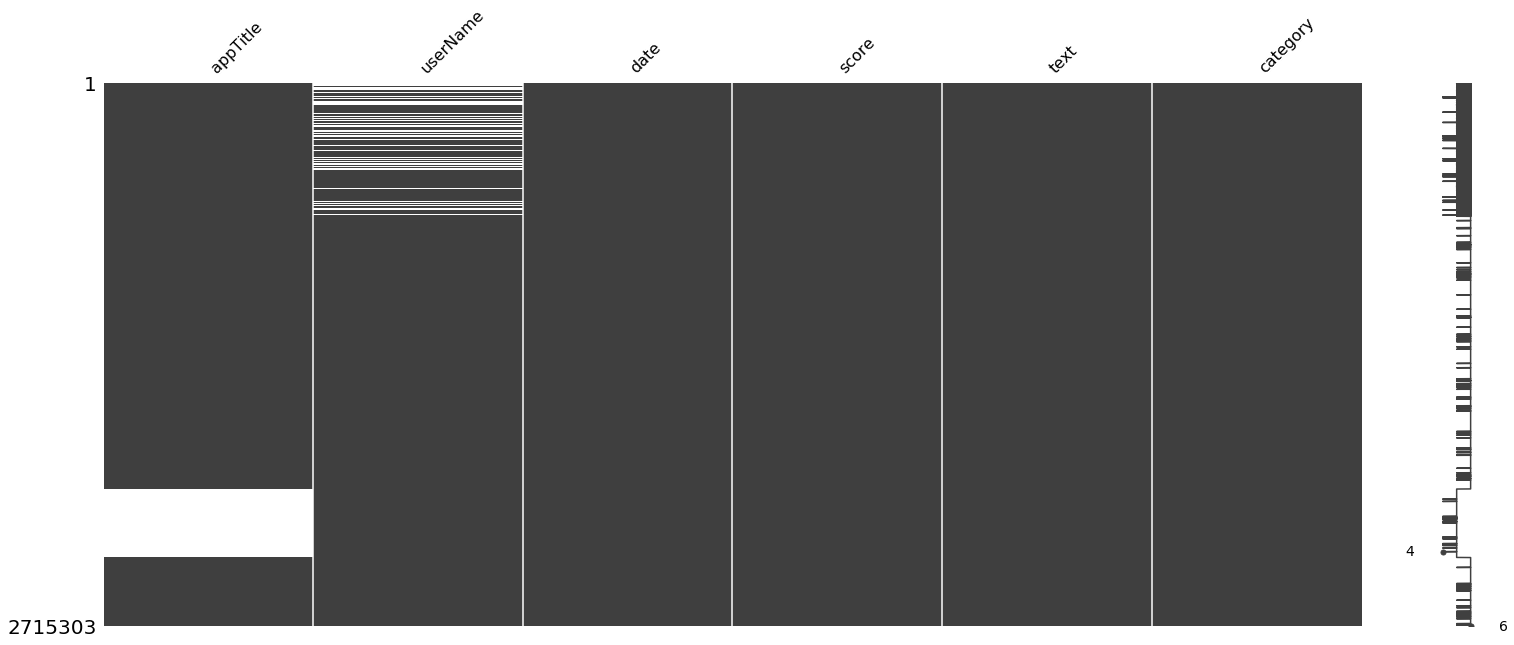

In [10]:
print(frame.shape)
msno.matrix(frame)

***
#### NULL VALUE REVIEW

In [11]:
def countnull(x):
    return np.sum(x.isnull())
def pernull(x):
    t=np.sum(x.isnull())
    return t/(x.count()+t)
pd.DataFrame([frame.apply(pernull),frame.apply(countnull)],index=['NaN Percentage','NaN #'])


,appTitle,userName,date,score,text,category
NaN Percentage,0.126031,0.082498,0.0,0.0,0.000067,0.0
NaN #,342211.000000,224007.000000,0.0,0.0,182.000000,0.0


___
#### 1. Drop duplicates and record how many unique reviews are collected?

In [12]:
print("Number of duplicated review:",np.sum(frame.duplicated()))
frame1 = frame.drop_duplicates(subset=None, keep='first', inplace=False)
answer1=len(frame1.index)
print("Number of unique review in the data:",answer1)

Number of duplicated review: 1236365
Number of unique review in the data: 1478938


___
#### 2. How many unique apps are in the dataset? How many apps in each of the 8 specified app categories?

In [21]:
frame2=frame1
frame2['appTitle_lower'] = frame2['appTitle'].str.lower()
answer2a=frame2['appTitle_lower'].nunique()
print("NUMBER UNIQUE APPS:",answer2a)

NUMBER UNIQUE APPS: 86


C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
answer2b=pd.DataFrame(frame2[frame2['appTitle_lower'].notna()].groupby(['category'])['appTitle_lower'].nunique())
answer2b

,appTitle_lower
category,
EDUCATION,10
ENTERTAINMENT,13
FAMILY,10
FINANCE,10
GAME_ACTION,11
HEALTH_AND_FITNESS,10
LIFESTYLE,12
MUSIC_AND_AUDIO,11


In [27]:
frame2[frame2['appTitle_lower'].notna()]

,appTitle,userName,date,score,text,category,appTitle_lower
0,Photomath,NaN,"March 8, 2019",5,nice,EDUCATION,photomath
1,Photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,photomath
2,Photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,photomath
3,Photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,photomath
4,Photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,photomath
5,Photomath,Sheryl Thomas,"March 8, 2019",5,amazing,EDUCATION,photomath
6,Photomath,אוביידו אדריאנה,"March 8, 2019",5,"Great tool for learning math, I love it!",EDUCATION,photomath
7,Photomath,Ramadhan,"March 8, 2019",5,mantap sangat gan... membantu belajar anda,EDUCATION,photomath
8,Photomath,Rohit Das,"March 8, 2019",5,perfect app,EDUCATION,photomath
9,Photomath,Kaleb Wallis,"March 8, 2019",5,great if your in school or have homework,EDUCATION,photomath


___
#### 3. How many reviews exist in each of the eight app-categories?

In [30]:
answer3=pd.DataFrame(frame2.groupby('category')['text'].size())
answer3

,text
category,
EDUCATION,137227
ENTERTAINMENT,226723
FAMILY,167172
FINANCE,185512
GAME_ACTION,252986
HEALTH_AND_FITNESS,154330
LIFESTYLE,137751
MUSIC_AND_AUDIO,217237


___

#### DETAIL REVIEW DATASET

**Load Detail Review from load the detailreview from 2019-03-08 to 2019-04-21**

In [31]:
# Create the path to the data location
path = r'detailreview1'
all_files = glob.glob(path + "/*.csv")

# Loading the data file by file 
datalist2 = []
for filename in all_files:
    # Loading the data without the header which is create after merging all the detail review files
    df = pd.read_csv(filename,header=0,names=np.arange(0,43))
    datalist2.append(df)     
    
# Merger all the data
detailreview = pd.concat(datalist2, axis=0, ignore_index=True)
detailreview=detailreview.iloc[:,0:22]
names=['appTitle','summary','installs','minInstalls','score','ratings','reviews','free','offersIAP','size','androidVersionText','developerId','genreId','familyGenreId','contentRating','adSupported','released','updated','version','recentChanges','appId','url']
detailreview.columns=names

# Preview
detailreview.head(1)

,appTitle,summary,installs,minInstalls,score,ratings,reviews,free,offersIAP,size,...,genreId,familyGenreId,contentRating,adSupported,released,updated,version,recentChanges,appId,url
0,Duolingo: Learn Languages Free,"Learn English, Spanish, French, German, Italia...","100,000,000+",100000000,4.71985,7258463,2788387,True,True,Varies with device,...,EDUCATION,FAMILY_EDUCATION,Everyone,True,"May 29, 2013",1551998991000,Varies with device,"Our mascot owl, Duo, is trading in his usual d...",com.duolingo,https://play.google.com/store/apps/details?id=...


**Load Detail Review from load the detailreview 2019-05-09**

In [32]:
# Create the path to the data location
path = r'detailreview2'
all_files = glob.glob(path + "/*.csv")

# Loading the data file by file 
datalist2 = []
for filename in all_files:
    # Loading the data without the header which is create after merging all the detail review files
    df = pd.read_csv(filename,header=0,names=np.arange(0,21))
    datalist2.append(df)     
    
# Merger all the data
detailreview2 = pd.concat(datalist2, axis=0, ignore_index=True)
detailreview2=detailreview.iloc[:,0:10]
names=['title','appId','url','icon','developer','developerId','priceText','free','summary','scoreText']
detailreview2.columns=names

# Preview
detailreview2.head(1)

,title,appId,url,icon,developer,developerId,priceText,free,summary,scoreText
0,Duolingo: Learn Languages Free,"Learn English, Spanish, French, German, Italia...","100,000,000+",100000000,4.71985,7258463,2788387,True,True,Varies with device



___
#### 4. What are the different contentRating groups in each app-category?

In [33]:
answer4=pd.DataFrame(detailreview.groupby('genreId')['contentRating'].unique())
answer4

,contentRating
genreId,
EDUCATION,[Everyone]
ENTERTAINMENT,"[Teen, Everyone, Mature 17+]"
FINANCE,[Everyone]
GAME_ACTION,"[Everyone, Teen, Mature 17+]"
GAME_ADVENTURE,"[Everyone 10+, Everyone]"
GAME_CASUAL,"[Everyone, Everyone 10+]"
GAME_EDUCATIONAL,[Everyone]
GAME_PUZZLE,[Everyone]
GAME_SIMULATION,[Everyone 10+]


___

#### 5. How many apps exist in each of these contentRating-sub-groups in each app-category?

In [37]:
answer5=pd.DataFrame(detailreview.groupby(['genreId','contentRating'])['appTitle'].size())
answer5

appTitle
genreId            contentRating          
EDUCATION          Everyone             66
ENTERTAINMENT      Everyone             16
                   Mature 17+            6
                   Teen                 48
FINANCE            Everyone             60
GAME_ACTION        Everyone             30
                   Mature 17+            6
                   Teen                 24
GAME_ADVENTURE     Everyone              6
                   Everyone 10+          6
GAME_CASUAL        Everyone              6
                   Everyone 10+          6
GAME_EDUCATIONAL   Everyone              6
GAME_PUZZLE        Everyone              8
GAME_SIMULATION    Everyone 10+          6
HEALTH_AND_FITNESS Everyone             60
LIFESTYLE          Everyone             51
                   Mature 17+            6
                   Teen                  1
MUSIC_AND_AUDIO    Everyone             12
                   Teen                 48
PHOTOGRAPHY        Everyone              1

___
#### 6. How many reviews in each contentRating-sub-groups in each app-category

In [38]:
answer6=pd.DataFrame(detailreview.groupby(['genreId','contentRating'])['reviews'].sum())
answer6

reviews
genreId            contentRating          
EDUCATION          Everyone       38346424
ENTERTAINMENT      Everyone        1731867
                   Mature 17+       213348
                   Teen           34625967
FINANCE            Everyone        8368128
GAME_ACTION        Everyone       24876647
                   Mature 17+     19033933
                   Teen           49456760
GAME_ADVENTURE     Everyone          85335
                   Everyone 10+   24156149
GAME_CASUAL        Everyone          19087
                   Everyone 10+   19857090
GAME_EDUCATIONAL   Everyone        2917547
GAME_PUZZLE        Everyone        1293692
GAME_SIMULATION    Everyone 10+     636194
HEALTH_AND_FITNESS Everyone        8997622
LIFESTYLE          Everyone        4049514
                   Mature 17+      5091935
                   Teen               8880
MUSIC_AND_AUDIO    Everyone         836336
                   Teen           45152540
PHOTOGRAPHY        Everyone         152933

___
### A2. TEXT PROCESSING

#### CREATE COLUMN TO STORE THE ORIGINAL REVIEW

In [43]:
frame2['text']=frame2['text'].astype(str)
frame2['text_org']=frame2['text']


C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


___
#### REMOVING PUNCTUATION AND NON-ASCII CHARACTERS

In [44]:
# remove non-ASCII
frame2['text'] = frame2['text'].str.replace('[^\x00-\x7F]','')
# remove punctuation
frame2['text'] = frame2['text'].str.replace('[{}]'.format(string.punctuation),'')


C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### REMOVE MULTIPLE CHARACTERS OCCURING MORE THAN 2 TIMES

In [45]:
import re
def replaceRepeat(x):
    return re.sub(r'([a-z])\1{2,}', r'\1\1', x)
frame2['text']= frame2['text'].map(replaceRepeat)


C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### REMOVE THE REVIEWS HAVING TWO OR LESS WORDS

In [46]:
def countword(x):
    return len(x.split(" ")) 
shortreview_index = frame2[frame2['text'].map(countword)<3].index.tolist()

In [47]:
frame3=frame2.drop(shortreview_index)

In [49]:
frame3.to_csv("newestdata_with_nonEng.csv")

#### REMOVE NON ENGLISH WORDS

**Due to low speed laptop the remove-non-English reviews are implemented in Google Colab. The code below is used to detect the non English words**

In [ ]:
import langid as ld
def enDect(x):
    return ld.classify(x)[0] !='en'
nonEn_index = frame3[frame3['text'].map(enDect)==True].index.tolist()
#frame4=frame3.drop(nonEn_index)



In [50]:
frame4 = pd.read_csv("newestdata_without_nonEng.csv",header=0)
frame4.columns=['index', 'appTitle', 'userName', 'date', 'score', 'text', 'category','appTitle_lower', 'text_org']
frame4.set_index('index')


C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,appTitle,userName,date,score,text,category,appTitle_lower,text_org
index,,,,,,,,
2,Photomath,NaN,"March 8, 2019",5,Great App Detailed answers Understandable answers,EDUCATION,photomath,Great App. Detailed answers. Understandable an...
6,Photomath,אוביידו אדריאנה,"March 8, 2019",5,Great tool for learning math I love it,EDUCATION,photomath,"Great tool for learning math, I love it!"
9,Photomath,Kaleb Wallis,"March 8, 2019",5,great if your in school or have homework,EDUCATION,photomath,great if your in school or have homework
10,Photomath,juana,"March 8, 2019",4,It is working amazing for me Now i love to fin...,EDUCATION,photomath,It is working amazing for me!!! Now i love to ...
11,Photomath,Duje Basic,"March 8, 2019",5,really great and you have all the explanations...,EDUCATION,photomath,really great and you have all the explanations...
13,Photomath,NaN,"March 8, 2019",5,IN LOVE WITH THIS APP YOU HELPED A LOT THANKYOU,EDUCATION,photomath,IN LOVE WITH THIS APP. YOU HELPED A LOT . THAN...
17,Photomath,The Hanika Homestead,"March 8, 2019",5,Very helpful for correcting papers or doing a ...,EDUCATION,photomath,"Very helpful for correcting papers, or doing a..."
18,Photomath,NaN,"March 8, 2019",4,can this app help with university maths,EDUCATION,photomath,can this app help with university maths?
19,Photomath,Tiffany Hohman,"March 8, 2019",5,Photo math is AWESOME,EDUCATION,photomath,Photo math is AWESOME!!!


In [91]:
frame4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936504 entries, 0 to 936503
Data columns (total 9 columns):
index             936504 non-null int64
appTitle          715455 non-null object
userName          840251 non-null object
date              936504 non-null object
score             936504 non-null int64
text              936504 non-null object
category          936504 non-null object
appTitle_lower    715455 non-null object
text_org          936504 non-null object
dtypes: int64(2), object(7)
memory usage: 64.3+ MB


***
#### 7a. Should we remove the reviews that contain two or less number of words?

1. It is possible for us to consider remove the reviews only containing two or less words. Due to the fact there are many scam reviews which can be made by the owers to promote the product or the competitors to degrade it.

2. Besides the above reasons, one another reason is that if someone give a genuine review about a product with 5 stars or 1 stars, they usually have a long comment to express good/bad feeling about the product.
If a customer has no impression with the product, their review is utterly short. Therefore I suggest that we should remove less-than-two-word comments for 1-score and 5-score groups

#### 7b Remove the reviews that have two or less number of words
Implemented before the remove non-English review to reducing the work load for langid run 

***
#### 8. How many reviews exist in each of the eight app-categories?

#### The non App_Title is not removed to utilize the information from the data as much as possible  

In [52]:
answer8=pd.DataFrame(frame4.groupby('category')['appTitle_lower'].size())
answer8

,appTitle_lower
category,
EDUCATION,95521
ENTERTAINMENT,129515
FAMILY,114058
FINANCE,124644
GAME_ACTION,133212
HEALTH_AND_FITNESS,109516
LIFESTYLE,88637
MUSIC_AND_AUDIO,141401


***
#### 9. How many reviews in each contentRating-sub-groups in each app-category

In [54]:
appTitle_CR=detailreview.drop_duplicates(subset ='appTitle',keep = 'first')[['appTitle','contentRating']]


In [55]:
frame4['contentRating']=frame4['appTitle'].map(appTitle_CR.set_index('appTitle')['contentRating'])

In [56]:
answer9=pd.DataFrame(frame4.groupby(['category','contentRating'])['text'].size())
answer9

text
category           contentRating       
EDUCATION          Everyone       67025
ENTERTAINMENT      Everyone        9924
                   Mature 17+      4742
                   Teen           88953
FAMILY             Everyone       50790
                   Everyone 10+   35620
FINANCE            Everyone       93488
GAME_ACTION        Everyone       52603
                   Mature 17+     11148
                   Teen           45894
HEALTH_AND_FITNESS Everyone       77215
LIFESTYLE          Everyone       50068
                   Mature 17+     13814
                   Teen            2005
MUSIC_AND_AUDIO    Everyone       15403
                   Teen           96763

***
#### 10. What is the number of reviews for each score (score column)? 

In [59]:
answer10=pd.DataFrame(frame4.groupby('score')['text'].size())
answer10

,text
score,
1,169719
2,41256
3,55058
4,100057
5,570414


***
#### 11. How many apps exist in each score-sub-group?

In [60]:
frame4_sub=frame4.drop_duplicates(subset ='appTitle_lower',keep = 'first')
answer11=pd.DataFrame(frame4_sub.groupby('score')['appTitle_lower'].nunique())
answer11

,appTitle_lower
score,
1,17
2,4
3,8
4,7
5,50


***
#### 12. Compare the number of reviews for each score in a plot (Remember to normalize the numbers when you are comparing them).

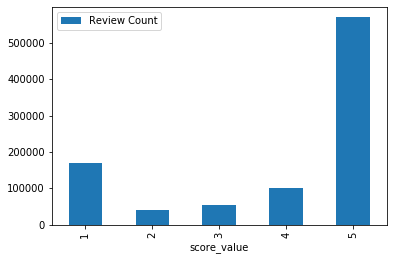

In [63]:
answer12=answer10
answer12.rename(columns={'text': 'Review Count'},inplace=True)
answer12['score_value']=answer12.index
answer12.plot.bar(x='score_value',y='Review Count')

***
#### 13. What is the average length of the reviews in each score-sub-group?

In [66]:
frame4['Review Length']=frame4['text'].str.len()
answer13=pd.DataFrame(frame4.groupby('score')['Review Length'].mean())
answer13

,Review Length
score,
1,122.634891
2,146.022688
3,121.856588
4,91.374047
5,58.721653


***
#### 14. Compare the average length of reviews in each score-sub-group in the 8 app categories

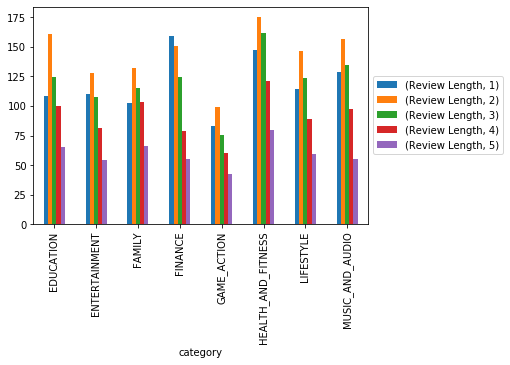

In [68]:
import matplotlib.pyplot as plt
answer14= pd.DataFrame(frame4.groupby(['category','score'])['Review Length'].mean())
answer14.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

***
#### 15. Compare the number of reviews in each score-sub-group in the 8 app categories

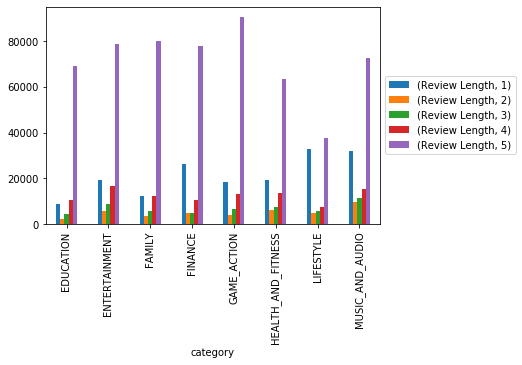

In [69]:
answer15= pd.DataFrame(frame4.groupby(['category','score'])['Review Length'].count())
answer15.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

***
#### 16. Compare the number of apps in each score-sub-group in the 8 app categories

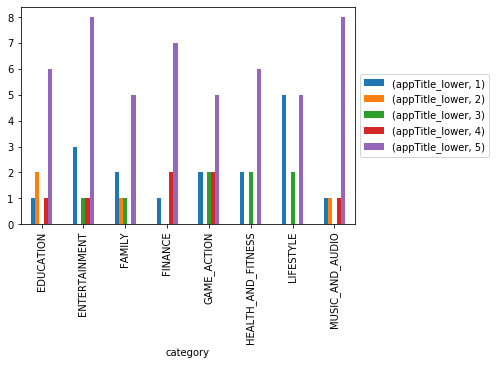

In [102]:
frame4_sub=frame4.drop_duplicates(subset ='appTitle_lower',keep = 'first') 
answer16= pd.DataFrame(frame4_sub.groupby(['category','score'])['appTitle_lower'].nunique())
answer16.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

***
#### 17. Is there any correlation between the length of the reviews and the score in each app-category?

In [103]:
frame4_sub=frame4.drop_duplicates(subset ='appTitle_lower',keep = 'first') 
answer17= pd.DataFrame(frame4_sub.groupby('category')[['score','Review Length']].corr().iloc[0::2,-1])
answer17

,,Review Length
category,,
EDUCATION,score,-0.598879
ENTERTAINMENT,score,-0.386721
FAMILY,score,-0.404420
FINANCE,score,-0.155493
GAME_ACTION,score,-0.503658
HEALTH_AND_FITNESS,score,-0.072240
LIFESTYLE,score,-0.247283
MUSIC_AND_AUDIO,score,-0.191785


From the table we can see that, the correlation between the length of reviews and the score in each app- category are different:  
* Strong correlation (|corr| >= 0.5) : EDUCATION, GAME_ACTION, 
* Medium correlation (0.5> |corr| >= 0.3) : ENTERTAINMENT, FAMILY
* Almost no correlation : FINANCE, HEALTH_AND_FITNESS, LIFESTYLE, MUSIC AND AUDIO    

***
#### 18. Find the evolution/changes of the star rating and length of reviews during time for each app category

**We can not use the date column in our database as there are many observations having un date format so we need to extract the date from the file name for this question** 

**First we need to reload the data newest review to get date information from the file name and attach that to frame4 database**

In [74]:
# Create the path to the data location
path = r'newestreview'
all_files = glob.glob(path + "/*.csv")

# Loading the data file by file and create a column named "category"
datalist = []
for filename in all_files:
    # extract the category name from the file name
    start = filename.find('FREE')
    end=filename.find('_apps.csv')
    category = filename[start+5:end]
    # extract the month information from the file name:
    monthinfo = filename[18:20]
    # Loading the data and attach it into the datalist
    df = pd.read_csv(filename)
    df['category']=category
    df['month']= monthinfo
    datalist.append(df)
    
# Merger all the data
frame_new = pd.concat(datalist, axis=0, ignore_index=True)
frame_new.head(1)


,appTitle,userName,date,score,text,category,month
0,Photomath,NaN,"March 8, 2019",5,nice,EDUCATION,03


In [76]:
# Removing all the rows which are not relevant
index_selection = list(frame4['index'])
frame_new=frame_new[frame_new.index.isin(index_selection)]
frame_new.head(1)

,appTitle,userName,date,score,text,category,month
2,Photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,03


In [77]:
frame5=frame4
series1 = list(frame_new['month'])
frame5['month']=series1

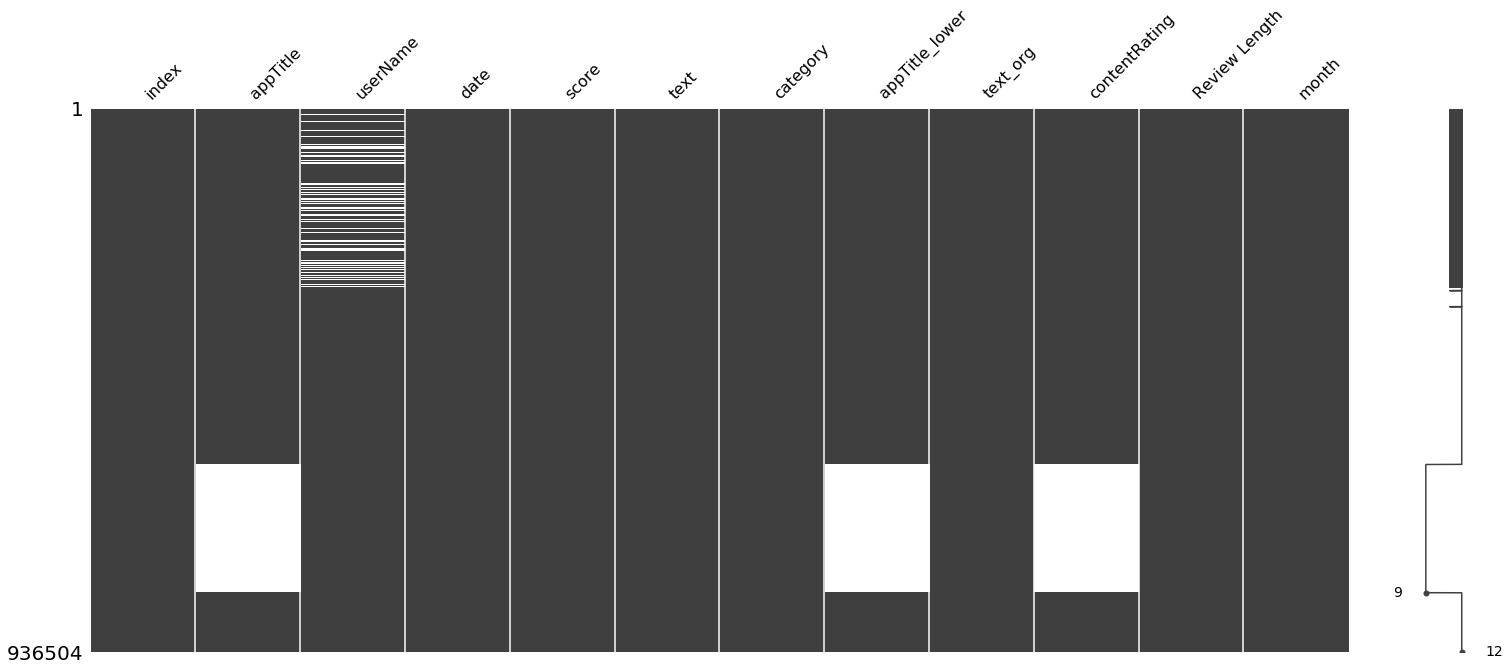

In [78]:
msno.matrix(frame5)

In [79]:
answer18=pd.DataFrame(frame5.groupby(['month','category'])['Review Length'].mean())

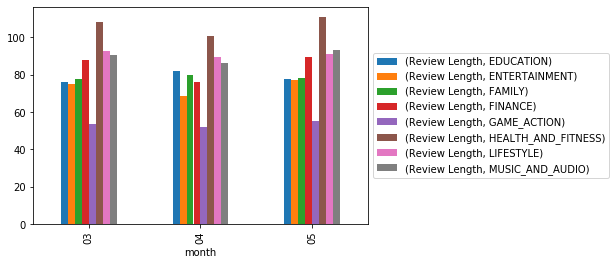

In [80]:
import matplotlib.pyplot as plt
answer18.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

***
#### 19. Compare your scores among the app categories. Do you see a difference between app categories?

**Random select the review**

In [130]:
grouprow_list= []
categorylist=list(frame5['category'].unique())

for i in categorylist:
    for j in range(1,6):
        grouprow=frame5[(frame5['score']==j) & (frame5['category']==i)].sample(5)
        grouprow_list.append(grouprow)
        
randomreview = pd.concat(grouprow_list, axis=0, ignore_index=True)
# the code is hidden to avoid of deleting the existing data
#randomreview.to_csv('Question19_ReviewSample.csv')

In [82]:
randomreview_Val = pd.read_csv("Question19_ReviewSample - ManualValidation.csv",header=0)
randomreview_Val.head(1)

,Unnamed: 0,index,appTitle,userName,date,score,Sentiment,Constructive,text,category,appTitle_lower,text_org,contentRating,Review Length,month
0,0,23381,Google Classroom,YG ENTERTAINMENT,29-Aug-18,1,-5,3,It did nothing,EDUCATION,google classroom,It did nothing,Everyone,14,3


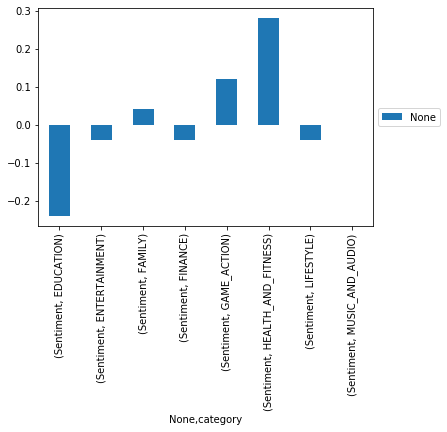

In [83]:
import matplotlib.pyplot as plt
answer19=pd.DataFrame(randomreview_Val.groupby(['category'])['Sentiment'].mean())
answer19.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Conclusion**: Only Education and (Health and Fitness) have the sentiment rating outstanding from the other categories.

### BACKUP FINAL DATA


In [89]:
frame5.to_csv("Data542_finaldata.csv")

***
***

# B. RESULT SUMMARY

#### 1. Drop duplicates and record how many unique reviews are collected?

In [13]:
print("Number of unique review in the data:",answer1)

Number of unique review in the data: 1478938


#### 2a. How many unique apps are in the dataset? How many apps in each of the 8 specified app categories?

In [24]:
print("NUMBER UNIQUE APPS:",answer2a)

NUMBER UNIQUE APPS: 86


#### 2b. How many apps in each of the 8 specified app categories?

In [28]:
answer2b

,appTitle_lower
category,
EDUCATION,10
ENTERTAINMENT,13
FAMILY,10
FINANCE,10
GAME_ACTION,11
HEALTH_AND_FITNESS,10
LIFESTYLE,12
MUSIC_AND_AUDIO,11


#### 3. How many reviews exist in each of the eight app-categories?

In [34]:
answer3

,text
category,
EDUCATION,137227
ENTERTAINMENT,226723
FAMILY,167172
FINANCE,185512
GAME_ACTION,252986
HEALTH_AND_FITNESS,154330
LIFESTYLE,137751
MUSIC_AND_AUDIO,217237


#### 4. What are the different contentRating groups in each app-category?

In [35]:
answer4

,contentRating
genreId,
EDUCATION,[Everyone]
ENTERTAINMENT,"[Teen, Everyone, Mature 17+]"
FINANCE,[Everyone]
GAME_ACTION,"[Everyone, Teen, Mature 17+]"
GAME_ADVENTURE,"[Everyone 10+, Everyone]"
GAME_CASUAL,"[Everyone, Everyone 10+]"
GAME_EDUCATIONAL,[Everyone]
GAME_PUZZLE,[Everyone]
GAME_SIMULATION,[Everyone 10+]


#### 5. How many apps exist in each of these contentRating-sub-groups in each app-category?

In [41]:
answer5

appTitle
genreId            contentRating          
EDUCATION          Everyone             66
ENTERTAINMENT      Everyone             16
                   Mature 17+            6
                   Teen                 48
FINANCE            Everyone             60
GAME_ACTION        Everyone             30
                   Mature 17+            6
                   Teen                 24
GAME_ADVENTURE     Everyone              6
                   Everyone 10+          6
GAME_CASUAL        Everyone              6
                   Everyone 10+          6
GAME_EDUCATIONAL   Everyone              6
GAME_PUZZLE        Everyone              8
GAME_SIMULATION    Everyone 10+          6
HEALTH_AND_FITNESS Everyone             60
LIFESTYLE          Everyone             51
                   Mature 17+            6
                   Teen                  1
MUSIC_AND_AUDIO    Everyone             12
                   Teen                 48
PHOTOGRAPHY        Everyone              1

#### 6. How many reviews in each contentRating-sub-groups in each app-category

In [40]:
answer6

reviews
genreId            contentRating          
EDUCATION          Everyone       38346424
ENTERTAINMENT      Everyone        1731867
                   Mature 17+       213348
                   Teen           34625967
FINANCE            Everyone        8368128
GAME_ACTION        Everyone       24876647
                   Mature 17+     19033933
                   Teen           49456760
GAME_ADVENTURE     Everyone          85335
                   Everyone 10+   24156149
GAME_CASUAL        Everyone          19087
                   Everyone 10+   19857090
GAME_EDUCATIONAL   Everyone        2917547
GAME_PUZZLE        Everyone        1293692
GAME_SIMULATION    Everyone 10+     636194
HEALTH_AND_FITNESS Everyone        8997622
LIFESTYLE          Everyone        4049514
                   Mature 17+      5091935
                   Teen               8880
MUSIC_AND_AUDIO    Everyone         836336
                   Teen           45152540
PHOTOGRAPHY        Everyone         152933

#### 7a. Should we remove the reviews that contain two or less number of words?

* 1. It is possible for us to consider remove the reviews only containing two or less words. Due to the fact there are many scam reviews which can be made by the owers to promote the product or the competitors to degrade it.  

* 2. Besides the above reasons, one another reason is that if someone give a genuine review about a product with 5 stars or 1 stars, they usually have a long comment to express good/bad feeling about the product.
If a customer has no impression with the product, their review is utterly short. Therefore I suggest that we should remove less-than-two-word comments for 1-score and 5-score groups

#### 7b Remove the reviews that have two or less number of words
Implemented before the remove non-English review to reducing the work load for langid run. The code below is used to removed the short reviews
The code is in hidden mode to avoid of running accidentally.

In [ ]:
#def countword(x):
#    return len(x.split(" ")) 
#shortreview_index = frame2[frame2['text'].map(countword)<3].index.tolist()
#frame3=frame2.drop(shortreview_index)

#### 8. How many reviews exist in each of the eight app-categories?

In [53]:
answer8

,appTitle_lower
category,
EDUCATION,95521
ENTERTAINMENT,129515
FAMILY,114058
FINANCE,124644
GAME_ACTION,133212
HEALTH_AND_FITNESS,109516
LIFESTYLE,88637
MUSIC_AND_AUDIO,141401


#### 9. How many reviews in each contentRating-sub-groups in each app-category

In [57]:
answer9

text
category           contentRating       
EDUCATION          Everyone       67025
ENTERTAINMENT      Everyone        9924
                   Mature 17+      4742
                   Teen           88953
FAMILY             Everyone       50790
                   Everyone 10+   35620
FINANCE            Everyone       93488
GAME_ACTION        Everyone       52603
                   Mature 17+     11148
                   Teen           45894
HEALTH_AND_FITNESS Everyone       77215
LIFESTYLE          Everyone       50068
                   Mature 17+     13814
                   Teen            2005
MUSIC_AND_AUDIO    Everyone       15403
                   Teen           96763

#### 10. What is the number of reviews for each score (score column)? 

In [61]:
answer10

,text
score,
1,169719
2,41256
3,55058
4,100057
5,570414


####  11. How many apps exist in each score-sub-group?

In [62]:
answer11

,appTitle_lower
score,
1,17
2,4
3,8
4,7
5,50


#### 12. Compare the number of reviews for each score in a plot (Remember to normalize the numbers when you are comparing them).

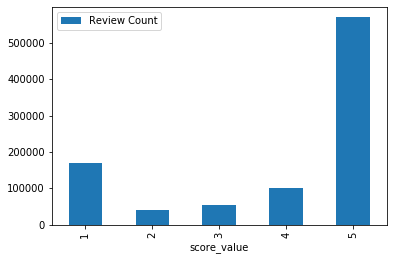

In [64]:
answer12.plot.bar(x='score_value',y='Review Count')

#### 13. What is the average length of the reviews in each score-sub-group?

In [67]:
answer13

,Review Length
score,
1,122.634891
2,146.022688
3,121.856588
4,91.374047
5,58.721653


#### 14. Compare the average length of reviews in each score-sub-group in the 8 app categories

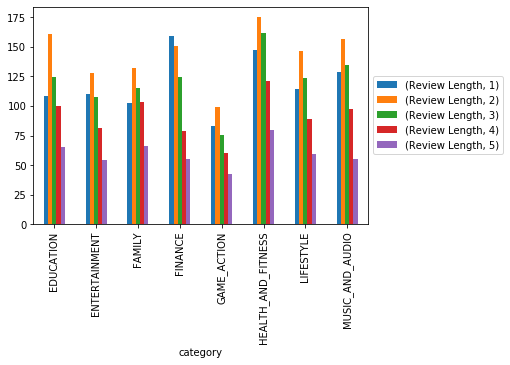

In [70]:
answer14= pd.DataFrame(frame4.groupby(['category','score'])['Review Length'].mean())
answer14.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### 15. Compare the number of reviews in each score-sub-group in the 8 app categories

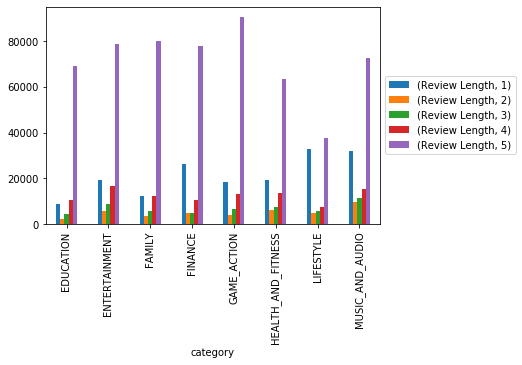

In [71]:
answer15= pd.DataFrame(frame4.groupby(['category','score'])['Review Length'].count())
answer15.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### 16. Compare the number of apps in each score-sub-group in the 8 app categories

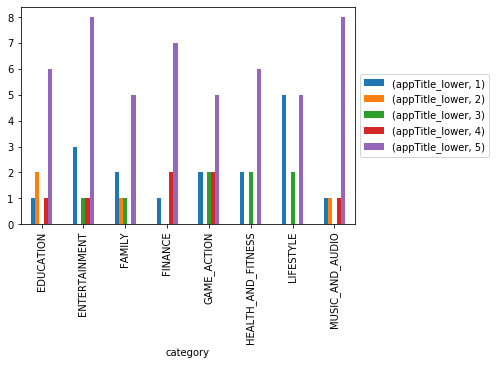

In [72]:
frame4_sub=frame4.drop_duplicates(subset ='appTitle_lower',keep = 'first') 
answer16= pd.DataFrame(frame4_sub.groupby(['category','score'])['appTitle_lower'].nunique())
answer16.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### 17. Is there any correlation between the length of the reviews and the score in each app-category?

From the table we can see that, the correlation between the length of reviews and the score in each app- category are different:

* Strong correlation (|corr| >= 0.5) : EDUCATION, GAME_ACTION,
* Medium correlation (0.5> |corr| >= 0.3) : ENTERTAINMENT, FAMILY
* Almost no correlation : FINANCE, HEALTH_AND_FITNESS, LIFESTYLE, MUSIC AND AUDIO

In [87]:
frame4_sub=frame4.drop_duplicates(subset ='appTitle_lower',keep = 'first') 
answer17= pd.DataFrame(frame4_sub.groupby('category')[['score','Review Length']].corr().iloc[0::2,-1])
answer17

,,Review Length
category,,
EDUCATION,score,-0.598879
ENTERTAINMENT,score,-0.386721
FAMILY,score,-0.404420
FINANCE,score,-0.155493
GAME_ACTION,score,-0.503658
HEALTH_AND_FITNESS,score,-0.072240
LIFESTYLE,score,-0.247283
MUSIC_AND_AUDIO,score,-0.191785


#### 18. Find the evolution/changes of the star rating and length of reviews during time for each app category

We can not use the date column in our database as there are many observations having un date format so we need to extract the date from the file name for this question

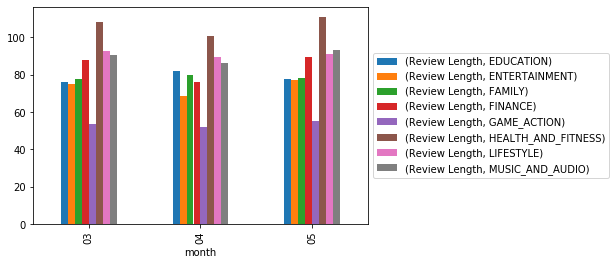

In [81]:
import matplotlib.pyplot as plt
answer18.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### 19. Compare your scores among the app categories. Do you see a difference between app categories?

**Conclusion: Only Education and (Health and Fitness) have the sentiment rating outstanding from the other categories.**

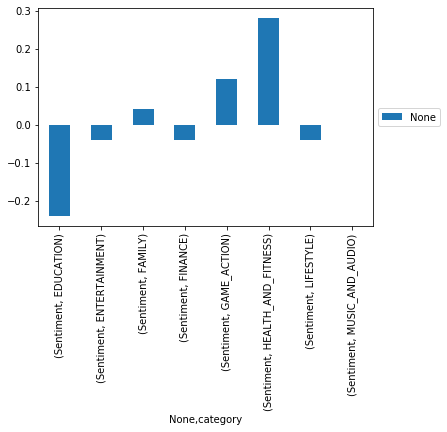

In [84]:
import matplotlib.pyplot as plt
answer19=pd.DataFrame(randomreview_Val.groupby(['category'])['Sentiment'].mean())
answer19.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))